<a href="https://colab.research.google.com/github/mhssain12/git-demo/blob/master/anngooglecolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [0]:
import pandas as pd
import numpy as np
import datetime
#import dateuntil
#import pandas
import csv
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
#data = pd.read_csv('solar irradiance data.csv')
#irradiance=pd.read_csv('irradiance.csv', parse_dates=["Date"], index_col="Date")
#irradiance['Date'] = pd.to_date(irradiance['Date'])
import tensorflow as tf
irradiance=pd.read_csv("/content/SRRL.csv")

In [0]:
irradiance.set_index(['Date', 'Time'], inplace=True)

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [0]:
with open('/content/dataonly.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
    
# data

In [0]:
#irradiance.head(5)
index=irradiance.index
columns = pd.MultiIndex.from_product([['SRRL','NVTFIR','STAC','NFC','SUA'], ['W/m^2','Temp']])
# irr=np.array(pd.read_csv("dataonly.csv"))
irr_data = pd.DataFrame(data, index=index, columns=columns)

In [0]:
irr_data.head(5)
#ealth_data.shape

irr_data.drop(('STAC', 'W/m^2'), axis=1, inplace=True)
irr_data.drop(('STAC', 'Temp'), axis=1, inplace=True)
irr_data.drop(('NFC', 'W/m^2'), axis=1, inplace=True)
irr_data.drop(('NFC', 'Temp'), axis=1, inplace=True)

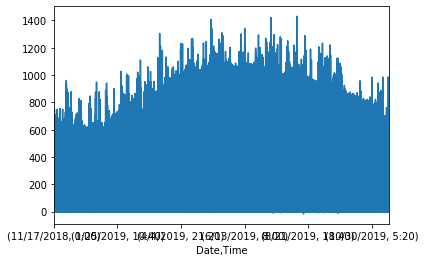

In [17]:
df=irr_data.astype(float)
df['SUA']['W/m^2'].plot()

In [18]:
df.head(5)

SRRL           NVTFIR             SUA       
                    W/m^2   Temp     W/m^2   Temp    W/m^2   Temp
Date       Time                                                  
11/17/2018 0:00 -0.455377  2.332  0.111212  1.906 -2.31264  11.81
           0:01 -0.416394  2.331  0.074142  1.859 -2.46681  11.80
           0:02 -0.447358  2.348  0.037071  1.829 -2.57782  11.76
           0:03 -0.449220  2.354  0.074142  1.804 -2.59015  11.74
           0:04 -0.446313  2.371  0.111212  1.824 -2.59015  11.71

In [19]:
df['Various', 'Min']=df.index.labels[1]
df['Various', 'Day']=df.index.labels[0]
df['SRRL']['W/m^2']['11/17/2019'].shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  


(1440,)

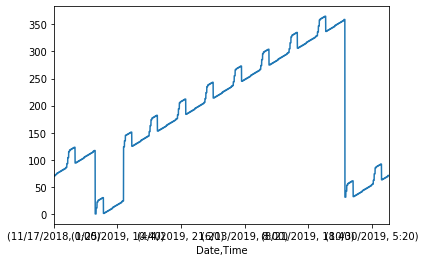

In [20]:
df['Various']['Day'].plot()

In [0]:
target_station= 'SRRL'

In [0]:
target_names= ['W/m^2', 'Temp']

In [0]:
shift_days=1
shift_steps= shift_days*1440  #Number of minutes

In [0]:
df_targets = df[target_station][target_names].shift(-shift_steps)

In [25]:
df[target_station][target_names].head(shift_steps + 5)

W/m^2   Temp
Date       Time                 
11/17/2018 0:00 -0.455377  2.332
           0:01 -0.416394  2.331
           0:02 -0.447358  2.348
           0:03 -0.449220  2.354
           0:04 -0.446313  2.371
...                   ...    ...
11/18/2018 0:00 -0.625652 -6.652
           0:01 -0.625124 -6.648
           0:02 -0.633417 -6.632
           0:03 -0.625535 -6.629
           0:04 -0.649521 -6.629

[1445 rows x 2 columns]

In [26]:
df_targets.head(5)

W/m^2   Temp
Date       Time                 
11/17/2018 0:00 -0.625652 -6.652
           0:01 -0.625124 -6.648
           0:02 -0.633417 -6.632
           0:03 -0.625535 -6.629
           0:04 -0.649521 -6.629

In [27]:
df_targets.tail()

W/m^2  Temp
Date       Time              
11/17/2019 23:55    NaN   NaN
           23:56    NaN   NaN
           23:57    NaN   NaN
           23:58    NaN   NaN
           23:59    NaN   NaN

In [0]:
x_data = df.values[0:-shift_steps]

In [29]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (525600, 8)


In [0]:
y_data = df_targets.values[:-shift_steps]

In [31]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (525600, 2)


In [32]:
num_data = len(x_data)
num_data

525600

In [0]:
train_split = 0.9

In [34]:
num_train = int(train_split * num_data)
num_train

473040

In [35]:
num_test = num_data - num_train
num_test

52560

In [36]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

525600

In [37]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

525600

In [38]:
num_x_signals = x_data.shape[1]
num_x_signals

8

In [39]:
num_y_signals = y_data.shape[1]
num_y_signals

2

In [40]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: -23.2
Max: 1473.88


In [0]:
x_scaler = MinMaxScaler()

In [0]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [43]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [0]:
x_test_scaled = x_scaler.transform(x_test)

In [0]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [46]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(473040, 8)
(473040, 2)


In [0]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [0]:
batch_size = 20

In [49]:
sequence_length = 1440 * 7 * 1
sequence_length

10080

In [0]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [0]:
x_batch, y_batch = next(generator)

In [52]:
print(x_batch.shape)
print(y_batch.shape)

(20, 10080, 8)
(20, 10080, 2)


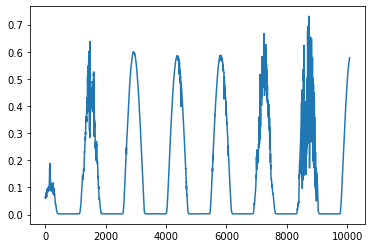

In [53]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

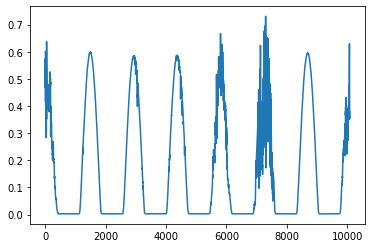

In [54]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [0]:
validation_data = (np.expand_dims(x_test_scaled, axis=0), np.expand_dims(y_test_scaled, axis=0))

In [0]:
model = Sequential()

In [57]:
model.add(GRU(units=256,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [0]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [0]:
warmup_steps = 50

In [0]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [0]:
optimizer = RMSprop(lr=1e-3)

In [63]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 256)         203520    
_________________________________________________________________
dense (Dense)                (None, None, 2)           514       
Total params: 204,034
Trainable params: 204,034
Non-trainable params: 0
_________________________________________________________________


In [0]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [0]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [0]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [0]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [0]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [82]:
%%time
model.fit_generator(generator=generator,
                    epochs=5,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/5
  1/100 [..............................] - ETA: 28:48 - loss: 0.0106
Epoch 00001: val_loss did not improve from 0.01044
100/100 [==============================] - 1867s 19s/step - loss: 0.0088 - val_loss: 0.0106
Epoch 2/5
  1/100 [..............................] - ETA: 28:13 - loss: 0.0105
Epoch 00002: val_loss did not improve from 0.01044
100/100 [==============================] - 1848s 18s/step - loss: 0.0089 - val_loss: 0.0105
Epoch 3/5
  1/100 [..............................] - ETA: 28:37 - loss: 0.0106
Epoch 00003: val_loss did not improve from 0.01044
100/100 [==============================] - 1834s 18s/step - loss: 0.0088 - val_loss: 0.0106
Epoch 4/5
  1/100 [..............................] - ETA: 28:40 - loss: 0.0107
Epoch 00004: val_loss did not improve from 0.01044
100/100 [==============================] - 1848s 18s/step - loss: 0.0087 - val_loss: 0.0107
Epoch 5/5
  1/100 [..............................] - ETA: 26:59 - loss: 0.0105
Epoch 00005: val_loss did not imp

In [0]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [84]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 17s 17s/sample - loss: 0.0104


In [85]:
print("loss (test-set):", result)

loss (test-set): 0.010436191223561764


In [0]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

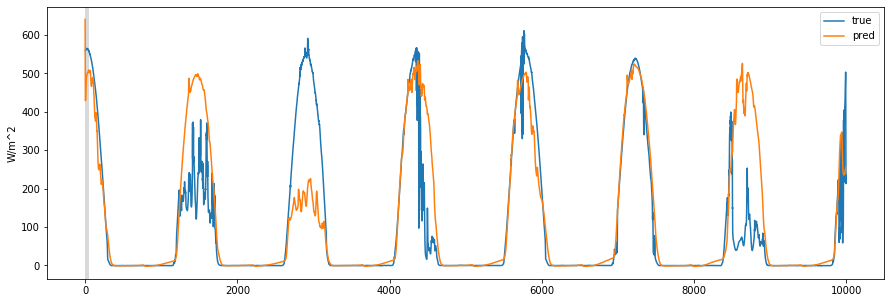

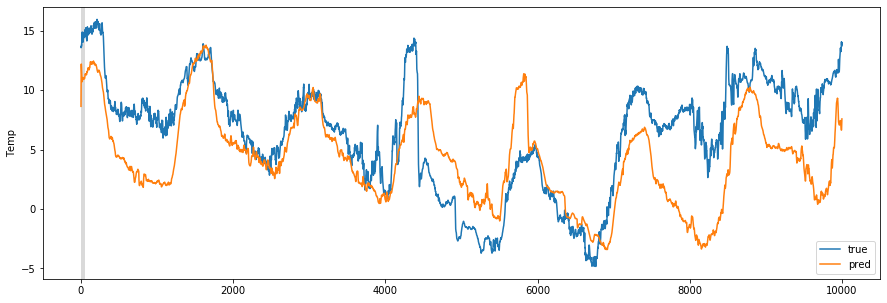

In [87]:
plot_comparison(start_idx=5000, length=10000, train=True)